# Data Preparation

In [ ]:
## Load TEDS-D 2017 Data into a Pandas Data Frame
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from os.path import exists
import os

## Specify WD
wd = "/home/abf/BINF667013_Final_Project/"
#wd = (
#    "/Users/adam/Documents/BINF667013_BigDataAnalyticsHealthcare/" +
#    "Final_Project/TEDS_Study"
#)
os.chdir(wd)

if exists("analysis_objects/teds_laws.csv"):
    teds_laws=pd.read_csv("analysis_objects/teds_laws.csv")
else:
    print("Generate Clean Dataset First")
if exists("analysis_objects/teds_imp_laws.csv"):
    teds_imp_laws=pd.read_csv("analysis_objects/teds_imp_laws.csv")
else:
    print("Generate Clean Dataset First")

# Exploratory Data Analysis

### Primary Substance by IC Legal Status

In [ ]:
totals=teds_laws.loc[:,['IC_law', 'SUB1']].assign(
    No_substance = lambda x: x.loc[:,['SUB1']].apply(lambda x: x['SUB1'] == 1, axis=1),
    Heroin = lambda x: x.loc[:,['SUB1']].apply(lambda x: x['SUB1'] == 2, axis=1),
    Cocaine = lambda x: x.loc[:,['SUB1']].apply(lambda x: x['SUB1'] == 3, axis=1),
    Marijuana = lambda x: x.loc[:,['SUB1']].apply(lambda x: x['SUB1'] == 4, axis=1),
    Heroin = lambda x: x.loc[:,['SUB1']].apply(lambda x: x['SUB1'] == 5, axis=1),
    NP_Methadone = lambda x: x.loc[:,['SUB1']].apply(lambda x: x['SUB1'] == 6, axis=1),
    OthOpiate = lambda x: x.loc[:,['SUB1']].apply(lambda x: x['SUB1'] == 7, axis=1),
    PCP = lambda x: x.loc[:,['SUB1']].apply(lambda x: x['SUB1'] == 7, axis=1),
    Hallucinogen = lambda x: x.loc[:,['SUB1']].apply(lambda x: x['SUB1'] == 9, axis=1),
    Methamphetamine = lambda x: x.loc[:,['SUB1']].apply(lambda x: x['SUB1'] == 10, axis=1),
    OthAmphet = lambda x: x.loc[:,['SUB1']].apply(lambda x: x['SUB1'] == 11, axis=1),
    OthStim = lambda x: x.loc[:,['SUB1']].apply(lambda x: x['SUB1'] == 12, axis=1),
    Benzo = lambda x: x.loc[:,['SUB1']].apply(lambda x: x['SUB1'] == 13, axis=1),
    OthTranq = lambda x: x.loc[:,['SUB1']].apply(lambda x: x['SUB1'] == 14, axis=1),
    Barbituates = lambda x: x.loc[:,['SUB1']].apply(lambda x: x['SUB1'] == 15, axis=1),
    OthSed = lambda x: x.loc[:,['SUB1']].apply(lambda x: x['SUB1'] == 16, axis=1),
    Inhalants = lambda x: x.loc[:,['SUB1']].apply(lambda x: x['SUB1'] == 17, axis=1),
    OTC_Med = lambda x: x.loc[:,['SUB1']].apply(lambda x: x['SUB1'] == 18, axis=1),
    Other = lambda x: x.loc[:,['SUB1']].apply(lambda x: x['SUB1'] == 19, axis=1),
    
).groupby(['IC_law']).sum().drop(columns=['SUB1'])
totals

In [ ]:
totals.div(totals.sum(axis=1), axis=0).reset_index()

In [ ]:
plt.xticks(rotation=90)
sns.barplot(
    data=pd.melt(
        totals.div(totals.sum(axis=1), axis=0).reset_index(),
        id_vars = 'IC_law',
        value_vars = [
             'No_substance','Alcohol','Cocaine','Marijuana','Heroin',
             'NP_Methadone', 'OthOpiate', 'PCP', 'Hallucinogen',
             'Methamphetamine','OthAmphet','OthStim','Benzo','OthTranq',
             'Barbituates','OthSed','Inhalants','OTC_Med','Other'
        ],
        var_name = "Primary Substance",
        value_name = "Frequency"
    ).assign(
        Law_Status = lambda x: x.apply(lambda y: 'No_IC_law' if y['IC_law'] == 0 else 'IC_law', axis=1)
    ),
    x="Primary Substance",
    y="Frequency",
    hue="Law_Status",
    
)

In [ ]:
totals.div(totals.sum(axis=0), axis=1).reset_index()

In [ ]:
plt.xticks(rotation=90)
sns.barplot(
    data=pd.melt(
        totals.div(totals.sum(axis=0), axis=1).reset_index(),
        id_vars = 'IC_law',
        value_vars = [
             'No_substance','Alcohol','Cocaine','Marijuana','Heroin',
             'NP_Methadone', 'OthOpiate', 'PCP', 'Hallucinogen',
             'Methamphetamine','OthAmphet','OthStim','Benzo','OthTranq',
             'Barbituates','OthSed','Inhalants','OTC_Med','Other'
        ],
        var_name = "Primary Substance",
        value_name = "Frequency"
    ).assign(
        Law_Status = lambda x: x.apply(lambda y: 'No_IC_law' if y['IC_law'] == 0 else 'IC_law', axis=1)
    ),
    x="Primary Substance",
    y="Frequency",
    hue="Law_Status",
    
)

### Summarize Relapses by IC Legal Status And Drug
Cases where the primary substance at admission is still being used at discharge will be considered relapses


In [ ]:
teds_laws.groupby(['IC_law']).sum().loc[:,['hrncases','hrn_cases', 'met_cases','alc_relapse','hrn_relapse', 'met_relapse']].assign(
    alc_rate = lambda x: x['alc_relapse'] / x['alc_cases'],
    hrn_rate = lambda x: x['hrn_relapse'] / x['hrn_cases'],
    met_rate = lambda x: x['met_relapse'] / x['met_cases']
)

In [ ]:

teds_imp_laws.groupby(['IC_law']).sum().loc[:,['alc_cases','hrn_cases', 'met_cases','alc_relapse','hrn_relapse', 'met_relapse']].assign(
    alc_rate = lambda x: x['alc_relapse'] / x['alc_cases'],
    hrn_rate = lambda x: x['hrn_relapse'] / x['hrn_cases'],
    met_rate = lambda x: x['met_relapse'] / x['met_cases']
)

In [ ]:
## Index casese of alcohol use at intake
alc_cases = teds_laws.alc_cases == 1

plt.figure(figsize=(6, 6))
plot_data = teds_laws.loc[
    alc_cases,['IC_law','alc_cases','alc_relapse']
].groupby(['IC_law']).sum().reset_index().assign(
    relapse_rate = lambda x: 100*(x['alc_relapse'] / x['alc_cases']),
    total = [100, 100]
)
print(plot_data)
total_bars = sns.barplot(
    x="IC_law",  
    y="total",
    data=plot_data, 
    color='darkblue'
)

rate_bars = sns.barplot(
    x="IC_law",  
    y="relapse_rate",
    data=plot_data, 
    color='lightblue'
)
plt.show()




In [ ]:
## Index casese of alcohol use at intake
alc_cases = teds_imp_laws.alc_cases == 1
plt.figure(figsize=(6, 6))
plot_data = teds_imp_laws.loc[
    alc_cases,['IC_law','alc_cases','alc_relapse']
].groupby(['IC_law']).sum().reset_index().assign(
    relapse_rate = lambda x: 100*(x['alc_relapse'] / x['alc_cases']),
    total = [100, 100]
)
print(plot_data)
total_bars = sns.barplot(
    x="IC_law",  
    y="total",
    data=plot_data, 
    color='darkblue'
)

rate_bars = sns.barplot(
    x="IC_law",  
    y="relapse_rate",
    data=plot_data, 
    color='lightblue'
)
plt.show()




In [ ]:
## Index casese of heroin use at intake
hrn_cases = teds_laws.hrn_cases == 1
plt.figure(figsize=(6, 6))
plot_data = teds_laws.loc[
    hrn_cases,['IC_law','hrn_cases','hrn_relapse']
].groupby(['IC_law']).sum().reset_index().assign(
    relapse_rate = lambda x: 100*(x['hrn_relapse'] / x['hrn_cases']),
    total = [100, 100]
)
print(plot_data)
total_bars = sns.barplot(
    x="IC_law",  
    y="total",
    data=plot_data, 
    color='darkblue'
)

rate_bars = sns.barplot(
    x="IC_law",  
    y="relapse_rate",
    data=plot_data, 
    color='lightblue'
)
plt.show()




In [ ]:
## Index casese of alcohol use at intake
hrn_cases = teds_imp_laws.hrn_cases == 1
plt.figure(figsize=(6, 6))
plot_data = teds_imp_laws.loc[
    hrn_cases,['IC_law','hrn_cases','hrn_relapse']
].groupby(['IC_law']).sum().reset_index().assign(
    relapse_rate = lambda x: 100*(x['hrn_relapse'] / x['hrn_cases']),
    total = [100, 100]
)
print(plot_data)
total_bars = sns.barplot(
    x="IC_law",  
    y="total",
    data=plot_data, 
    color='darkblue'
)

rate_bars = sns.barplot(
    x="IC_law",  
    y="relapse_rate",
    data=plot_data, 
    color='lightblue'
)
plt.show()




In [ ]:
## Index casese of methamphetamine use at intake
met_cases = teds_laws.met_cases == 1

plt.figure(figsize=(6, 6))
plot_data = teds_laws.loc[
    met_cases,['IC_law','met_cases','met_relapse']
].groupby(['IC_law']).sum().reset_index().assign(
    relapse_rate = lambda x: 100*(x['met_relapse'] / x['met_cases']),
    total = [100, 100]
)
print(plot_data)
total_bars = sns.barplot(
    x="IC_law",  
    y="total",
    data=plot_data, 
    color='darkblue'
)

rate_bars = sns.barplot(
    x="IC_law",  
    y="relapse_rate",
    data=plot_data, 
    color='lightblue'
)
plt.show()




In [ ]:
## Index casese of methamphetamine use at intake
met_cases = teds_imp_laws.met_cases == 1

plt.figure(figsize=(6, 6))
plot_data = teds_imp_laws.loc[
    met_cases,['IC_law','met_cases','met_relapse']
].groupby(['IC_law']).sum().reset_index().assign(
    relapse_rate = lambda x: 100*(x['met_relapse'] / x['met_cases']),
    total = [100, 100]
)
print(plot_data)
total_bars = sns.barplot(
    x="IC_law",  
    y="total",
    data=plot_data, 
    color='darkblue'
)

rate_bars = sns.barplot(
    x="IC_law",  
    y="relapse_rate",
    data=plot_data, 
    color='lightblue'
)
plt.show()




### IC Laws and Referral Source

**Total Cases in Each Category by IC Law, for Alcohol Patients**

In [ ]:
alc_cases = teds_laws.alc_cases == 1
totals=teds_laws.loc[alc_cases,['IC_law', 'PSOURCE']].assign(
    individual = lambda x: x.loc[:,['PSOURCE']].apply(lambda x: x['PSOURCE'] == 1, axis=1),
    treatment = lambda x: x.loc[:,['PSOURCE']].apply(lambda x: x['PSOURCE'] == 2, axis=1),
    health = lambda x: x.loc[:,['PSOURCE']].apply(lambda x: x['PSOURCE'] == 3, axis=1),
    school = lambda x: x.loc[:,['PSOURCE']].apply(lambda x: x['PSOURCE'] == 4, axis=1),
    employer = lambda x: x.loc[:,['PSOURCE']].apply(lambda x: x['PSOURCE'] == 5, axis=1),
    community = lambda x: x.loc[:,['PSOURCE']].apply(lambda x: x['PSOURCE'] == 6, axis=1),
    adjudicated = lambda x: x.loc[:,['PSOURCE']].apply(lambda x: x['PSOURCE'] == 7, axis=1)
).groupby(['IC_law']).sum().drop(columns=['PSOURCE'])
totals

**Alcohol Patients: Proportion Cases in each referal category by IC Laws**

In [ ]:
 totals.div(totals.sum(axis=1), axis=0).reset_index()

In [ ]:
plt.xticks(rotation=90)
sns.barplot(
    data=pd.melt(
        totals.div(totals.sum(axis=1), axis=0).reset_index(),
        id_vars = 'IC_law',
        value_vars = ['individual', 'treatment', 'health', 'school', 'employer', 'community', 'adjudicated'],
        var_name = "Referral Source",
        value_name = "Frequency"
    ).assign(
        Law_Status = lambda x: x.apply(lambda y: 'No_IC_law' if y['IC_law'] == 0 else 'IC_law', axis=1)
    ),
    x="Referral Source",
    y="Frequency",
    hue="Law_Status",
    
)

**Alcohol Patients: Proportion of cases in each Referal category that are subject to IC Laws**

In [ ]:
totals.div(totals.sum(axis=0), axis=1).reset_index()

In [ ]:
plt.xticks(rotation=90)
sns.barplot(
    data=pd.melt(
        totals.div(totals.sum(axis=0), axis=1).reset_index(),
        id_vars = 'IC_law',
        value_vars = ['individual', 'treatment', 'health', 'school', 'employer', 'community', 'adjudicated'],
        var_name = "Referral Source",
        value_name = "Frequency"
    ).assign(
        Law_Status = lambda x: x.apply(lambda y: 'No_IC_law' if y['IC_law'] == 0 else 'IC_law', axis=1)
    ),
    x="Referral Source",
    y="Frequency",
    hue="Law_Status",
    
)

**Total Cases in Each Category by IC Law, for Heroin Patients**

In [ ]:
hrn_cases = teds_laws.hrn_cases == 1
totals=teds_laws.loc[hrn_cases,['IC_law', 'PSOURCE']].assign(
    individual = lambda x: x.loc[:,['PSOURCE']].apply(lambda x: x['PSOURCE'] == 1, axis=1),
    treatment = lambda x: x.loc[:,['PSOURCE']].apply(lambda x: x['PSOURCE'] == 2, axis=1),
    health = lambda x: x.loc[:,['PSOURCE']].apply(lambda x: x['PSOURCE'] == 3, axis=1),
    school = lambda x: x.loc[:,['PSOURCE']].apply(lambda x: x['PSOURCE'] == 4, axis=1),
    employer = lambda x: x.loc[:,['PSOURCE']].apply(lambda x: x['PSOURCE'] == 5, axis=1),
    community = lambda x: x.loc[:,['PSOURCE']].apply(lambda x: x['PSOURCE'] == 6, axis=1),
    adjudicated = lambda x: x.loc[:,['PSOURCE']].apply(lambda x: x['PSOURCE'] == 7, axis=1)
).groupby(['IC_law']).sum().drop(columns=['PSOURCE'])
totals

**Heroin Patients: Proportion Cases in each referal category by IC Laws**

In [ ]:
 totals.div(totals.sum(axis=1), axis=0).reset_index()

In [ ]:
plt.xticks(rotation=90)
sns.barplot(
    data=pd.melt(
        totals.div(totals.sum(axis=1), axis=0).reset_index(),
        id_vars = 'IC_law',
        value_vars = ['individual', 'treatment', 'health', 'school', 'employer', 'community', 'adjudicated'],
        var_name = "Referral Source",
        value_name = "Frequency"
    ).assign(
        Law_Status = lambda x: x.apply(lambda y: 'No_IC_law' if y['IC_law'] == 0 else 'IC_law', axis=1)
    ),
    x="Referral Source",
    y="Frequency",
    hue="Law_Status",
    
)

**Heroin Patients: Proportion of cases in each Referal category that are subject to IC Laws**

In [ ]:
totals.div(totals.sum(axis=0), axis=1).reset_index()

In [ ]:
plt.xticks(rotation=90)
sns.barplot(
    data=pd.melt(
        totals.div(totals.sum(axis=0), axis=1).reset_index(),
        id_vars = 'IC_law',
        value_vars = ['individual', 'treatment', 'health', 'school', 'employer', 'community', 'adjudicated'],
        var_name = "Referral Source",
        value_name = "Frequency"
    ).assign(
        Law_Status = lambda x: x.apply(lambda y: 'No_IC_law' if y['IC_law'] == 0 else 'IC_law', axis=1)
    ),
    x="Referral Source",
    y="Frequency",
    hue="Law_Status",
    
)

**Total Cases in Each Category by IC Law, for Methamphetamine Patients**

In [ ]:
met_cases = teds_laws.met_cases == 1
totals=teds_laws.loc[met_cases,['IC_law', 'PSOURCE']].assign(
    individual = lambda x: x.loc[:,['PSOURCE']].apply(lambda x: x['PSOURCE'] == 1, axis=1),
    treatment = lambda x: x.loc[:,['PSOURCE']].apply(lambda x: x['PSOURCE'] == 2, axis=1),
    health = lambda x: x.loc[:,['PSOURCE']].apply(lambda x: x['PSOURCE'] == 3, axis=1),
    school = lambda x: x.loc[:,['PSOURCE']].apply(lambda x: x['PSOURCE'] == 4, axis=1),
    employer = lambda x: x.loc[:,['PSOURCE']].apply(lambda x: x['PSOURCE'] == 5, axis=1),
    community = lambda x: x.loc[:,['PSOURCE']].apply(lambda x: x['PSOURCE'] == 6, axis=1),
    adjudicated = lambda x: x.loc[:,['PSOURCE']].apply(lambda x: x['PSOURCE'] == 7, axis=1)
).groupby(['IC_law']).sum().drop(columns=['PSOURCE'])
totals

**Methamphetamine Patients: Proportion Cases in each referal category by IC Laws**

In [ ]:
 totals.div(totals.sum(axis=1), axis=0).reset_index()

In [ ]:
plt.xticks(rotation=90)
sns.barplot(
    data=pd.melt(
        totals.div(totals.sum(axis=1), axis=0).reset_index(),
        id_vars = 'IC_law',
        value_vars = ['individual', 'treatment', 'health', 'school', 'employer', 'community', 'adjudicated'],
        var_name = "Referral Source",
        value_name = "Frequency"
    ).assign(
        Law_Status = lambda x: x.apply(lambda y: 'No_IC_law' if y['IC_law'] == 0 else 'IC_law', axis=1)
    ),
    x="Referral Source",
    y="Frequency",
    hue="Law_Status",
    
)

**Methamphetamine Patients: Proportion of cases in each Referal category that are subject to IC Laws**

In [ ]:
totals.div(totals.sum(axis=0), axis=1).reset_index()

In [ ]:
plt.xticks(rotation=90)
sns.barplot(
    data=pd.melt(
        totals.div(totals.sum(axis=0), axis=1).reset_index(),
        id_vars = 'IC_law',
        value_vars = ['individual', 'treatment', 'health', 'school', 'employer', 'community', 'adjudicated'],
        var_name = "Referral Source",
        value_name = "Frequency"
    ).assign(
        Law_Status = lambda x: x.apply(lambda y: 'No_IC_law' if y['IC_law'] == 0 else 'IC_law', axis=1)
    ),
    x="Referral Source",
    y="Frequency",
    hue="Law_Status",
    
)

### Distibution of SERVICES by IC Law Status

**Total Cases in Each Category by IC Law, for Alcohol Patients**

In [ ]:
totals=teds_imp_laws.loc[alc_cases,['IC_law', 'SERVICES']].assign(
    Detox_24H_Inpt = lambda x: x.loc[:,['SERVICES']].apply(lambda x: x['SERVICES'] == 1, axis=1),
    Detox_24H_Res = lambda x: x.loc[:,['SERVICES']].apply(lambda x: x['SERVICES'] == 2, axis=1),
    Rehab_Non_Detox = lambda x: x.loc[:,['SERVICES']].apply(lambda x: x['SERVICES'] == 3, axis=1),
    Rehab_30_Day = lambda x: x.loc[:,['SERVICES']].apply(lambda x: x['SERVICES'] == 4, axis=1),
    Rehab_Extended = lambda x: x.loc[:,['SERVICES']].apply(lambda x: x['SERVICES'] == 5, axis=1),
    Ambulatory_Int = lambda x: x.loc[:,['SERVICES']].apply(lambda x: x['SERVICES'] == 6, axis=1),
    Ambulatory_NonInt = lambda x: x.loc[:,['SERVICES']].apply(lambda x: x['SERVICES'] == 7, axis=1),
    Ambulatory_Detox = lambda x: x.loc[:,['SERVICES']].apply(lambda x: x['SERVICES'] == 7, axis=1)
).groupby(['IC_law']).sum().drop(columns=['SERVICES'])
totals

**Alcohol Patients: Proportion Cases in each service category by IC Laws**

In [ ]:
 totals.div(totals.sum(axis=1), axis=0).reset_index()

In [ ]:
plt.xticks(rotation=90)
sns.barplot(
    data=pd.melt(
        totals.div(totals.sum(axis=1), axis=0).reset_index(),
        id_vars = 'IC_law',
        value_vars = [
            'Detox_24H_Inpt','Detox_24H_Res','Rehab_Non_Detox',
            'Rehab_30_Day','Rehab_Extended','Ambulatory_Int',
            'Ambulatory_NonInt','Ambulatory_Detox'
        ],
        var_name = "Services",
        value_name = "Frequency"
    ).assign(
        Law_Status = lambda x: x.apply(lambda y: 'No_IC_law' if y['IC_law'] == 0 else 'IC_law', axis=1)
    ),
    x="Services",
    y="Frequency",
    hue="Law_Status",
    
)

**Alcohol Patients: Proportion of cases in each Service category that are subject to IC Laws**

In [ ]:
totals.div(totals.sum(axis=0), axis=1).reset_index()

In [ ]:
plt.xticks(rotation=90)
sns.barplot(
    data=pd.melt(
        totals.div(totals.sum(axis=0), axis=1).reset_index(),
        id_vars = 'IC_law',
            value_vars = [
            'Detox_24H_Inpt','Detox_24H_Res','Rehab_Non_Detox',
            'Rehab_30_Day','Rehab_Extended','Ambulatory_Int',
            'Ambulatory_NonInt','Ambulatory_Detox'
        ],
        var_name = "Services",
        value_name = "Frequency"
    ).assign(
        Law_Status = lambda x: x.apply(lambda y: 'No_IC_law' if y['IC_law'] == 0 else 'IC_law', axis=1)
    ),
    x="Services",
    y="Frequency",
    hue="Law_Status",
    
)

**Total Cases in Each Category by IC Law, for Heroin Patients**

In [ ]:
totals=teds_imp_laws.loc[hrn_cases,['IC_law', 'SERVICES']].assign(
    individual = lambda x: x.loc[:,['SERVICES']].apply(lambda x: x['SERVICES'] == 1, axis=1),
    treatment = lambda x: x.loc[:,['SERVICES']].apply(lambda x: x['SERVICES'] == 2, axis=1),
    health = lambda x: x.loc[:,['SERVICES']].apply(lambda x: x['SERVICES'] == 3, axis=1),
    school = lambda x: x.loc[:,['SERVICES']].apply(lambda x: x['SERVICES'] == 4, axis=1),
    employer = lambda x: x.loc[:,['SERVICES']].apply(lambda x: x['SERVICES'] == 5, axis=1),
    community = lambda x: x.loc[:,['SERVICES']].apply(lambda x: x['SERVICES'] == 6, axis=1),
    adjudicated = lambda x: x.loc[:,['SERVICES']].apply(lambda x: x['SERVICES'] == 7, axis=1)
).groupby(['IC_law']).sum().drop(columns=['SERVICES'])
totals

**Heroin Patients: Proportion Cases in each referal category by IC Laws**

In [ ]:
 totals.div(totals.sum(axis=1), axis=0).reset_index()

In [ ]:
plt.xticks(rotation=90)
sns.barplot(
    data=pd.melt(
        totals.div(totals.sum(axis=1), axis=0).reset_index(),
        id_vars = 'IC_law',
        value_vars = ['individual', 'treatment', 'health', 'school', 'employer', 'community', 'adjudicated'],
        var_name = "Referral Source",
        value_name = "Frequency"
    ).assign(
        Law_Status = lambda x: x.apply(lambda y: 'No_IC_law' if y['IC_law'] == 0 else 'IC_law', axis=1)
    ),
    x="Referral Source",
    y="Frequency",
    hue="Law_Status"
)

**Heroin Patients: Proportion of cases in each Referal category that are subject to IC Laws**

In [ ]:
totals.div(totals.sum(axis=0), axis=1).reset_index()

In [ ]:
plt.xticks(rotation=90)
sns.barplot(
    data=pd.melt(
        totals.div(totals.sum(axis=0), axis=1).reset_index(),
        id_vars = 'IC_law',
        value_vars = ['individual', 'treatment', 'health', 'school', 'employer', 'community', 'adjudicated'],
        var_name = "Referral Source",
        value_name = "Frequency"
    ).assign(
        Law_Status = lambda x: x.apply(lambda y: 'No_IC_law' if y['IC_law'] == 0 else 'IC_law', axis=1)
    ),
    x="Referral Source",
    y="Frequency",
    hue="Law_Status"
)

**Total Cases in Each Category by IC Law, for Methamphetamine Patients**

In [ ]:
totals=teds_imp_laws.loc[met_cases,['IC_law', 'SERVICES']].assign(
    individual = lambda x: x.loc[:,['SERVICES']].apply(lambda x: x['SERVICES'] == 1, axis=1),
    treatment = lambda x: x.loc[:,['SERVICES']].apply(lambda x: x['SERVICES'] == 2, axis=1),
    health = lambda x: x.loc[:,['SERVICES']].apply(lambda x: x['SERVICES'] == 3, axis=1),
    school = lambda x: x.loc[:,['SERVICES']].apply(lambda x: x['SERVICES'] == 4, axis=1),
    employer = lambda x: x.loc[:,['SERVICES']].apply(lambda x: x['SERVICES'] == 5, axis=1),
    community = lambda x: x.loc[:,['SERVICES']].apply(lambda x: x['SERVICES'] == 6, axis=1),
    adjudicated = lambda x: x.loc[:,['SERVICES']].apply(lambda x: x['SERVICES'] == 7, axis=1)
).groupby(['IC_law']).sum().drop(columns=['SERVICES'])
totals

**Methamphetamine Patients: Proportion Cases in each referal category by IC Laws**

In [ ]:
 totals.div(totals.sum(axis=1), axis=0).reset_index()

In [ ]:
plt.xticks(rotation=90)
sns.barplot(
    data=pd.melt(
        totals.div(totals.sum(axis=1), axis=0).reset_index(),
        id_vars = 'IC_law',
        value_vars = ['individual', 'treatment', 'health', 'school', 'employer', 'community', 'adjudicated'],
        var_name = "Referral Source",
        value_name = "Frequency"
    ).assign(
        Law_Status = lambda x: x.apply(lambda y: 'No_IC_law' if y['IC_law'] == 0 else 'IC_law', axis=1)
    ),
    x="Referral Source",
    y="Frequency",
    hue="Law_Status"
)

**Methamphetamine Patients: Proportion of cases in each Referal category that are subject to IC Laws**

In [ ]:
totals.div(totals.sum(axis=0), axis=1).reset_index()

In [ ]:
plt.xticks(rotation=90)
sns.barplot(
    data=pd.melt(
        totals.div(totals.sum(axis=0), axis=1).reset_index(),
        id_vars = 'IC_law',
        value_vars = ['individual', 'treatment', 'health', 'school', 'employer', 'community', 'adjudicated'],
        var_name = "Referral Source",
        value_name = "Frequency"
    ).assign(
        Law_Status = lambda x: x.apply(lambda y: 'No_IC_law' if y['IC_law'] == 0 else 'IC_law', axis=1)
    ),
    x="Referral Source",
    y="Frequency",
    hue="Law_Status"
)

### Distribution ofReason For Termination by IC Law Status

**Alcohol Patients: Proportion Cases in each dischrage category by IC Laws**

In [ ]:
alc_cases = teds_laws.alc_cases == 1
totals=teds_laws.loc[hrn_cases,['IC_law', 'REASON']].assign(
    Completed = lambda x: x.loc[:,['REASON']].apply(lambda x: x['REASON'] == 1, axis=1),
    Dropout = lambda x: x.loc[:,['REASON']].apply(lambda x: x['REASON'] == 2, axis=1),
    Terminated = lambda x: x.loc[:,['REASON']].apply(lambda x: x['REASON'] == 3, axis=1),
    Transferred = lambda x: x.loc[:,['REASON']].apply(lambda x: x['REASON'] == 4, axis=1),
    Incarcerated = lambda x: x.loc[:,['REASON']].apply(lambda x: x['REASON'] == 5, axis=1),
    Death = lambda x: x.loc[:,['REASON']].apply(lambda x: x['REASON'] == 6, axis=1),
    Other = lambda x: x.loc[:,['REASON']].apply(lambda x: x['REASON'] == 7, axis=1)
).groupby(['IC_law']).sum().drop(columns=['REASON'])
totals

In [ ]:
 totals.div(totals.sum(axis=1), axis=0).reset_index()

In [ ]:
plt.xticks(rotation=90)
sns.barplot(
    data=pd.melt(
        totals.div(totals.sum(axis=1), axis=0).reset_index(),
        id_vars = 'IC_law',
        value_vars = ['Completed', 'Dropout', 'Terminated', 'Transferred', 'Incarcerated', 'Death', 'Other'],
        var_name = "Reason for Discharge",
        value_name = "Frequency"
    ).assign(
        Law_Status = lambda x: x.apply(lambda y: 'No_IC_law' if y['IC_law'] == 0 else 'IC_law', axis=1)
    ),
    x="Reason for Discharge",
    y="Frequency",
    hue="Law_Status",
    
)

**Alcohol Patients: Proportion of cases in each discharge category that are subject to IC Laws**

In [ ]:
totals.div(totals.sum(axis=0), axis=1).reset_index()

In [ ]:
plt.xticks(rotation=90)
sns.barplot(
    data=pd.melt(
        totals.div(totals.sum(axis=0), axis=1).reset_index(),
        id_vars = 'IC_law',
        value_vars = ['Completed', 'Dropout', 'Terminated', 'Transferred', 'Incarcerated', 'Death', 'Other'],
        var_name = "Reason for Discharge",
        value_name = "Frequency"
    ).assign(
        Law_Status = lambda x: x.apply(lambda y: 'No_IC_law' if y['IC_law'] == 0 else 'IC_law', axis=1)
    ),
    x="Reason for Discharge",
    y="Frequency",
    hue="Law_Status",
    
)

**Heroin Patients: Proportion Cases in each dischrage category by IC Laws**

In [ ]:
hrn_cases = teds_laws.hrn_cases == 1
totals=teds_laws.loc[hrn_cases,['IC_law', 'REASON']].assign(
    Completed = lambda x: x.loc[:,['REASON']].apply(lambda x: x['REASON'] == 1, axis=1),
    Dropout = lambda x: x.loc[:,['REASON']].apply(lambda x: x['REASON'] == 2, axis=1),
    Terminated = lambda x: x.loc[:,['REASON']].apply(lambda x: x['REASON'] == 3, axis=1),
    Transferred = lambda x: x.loc[:,['REASON']].apply(lambda x: x['REASON'] == 4, axis=1),
    Incarcerated = lambda x: x.loc[:,['REASON']].apply(lambda x: x['REASON'] == 5, axis=1),
    Death = lambda x: x.loc[:,['REASON']].apply(lambda x: x['REASON'] == 6, axis=1),
    Other = lambda x: x.loc[:,['REASON']].apply(lambda x: x['REASON'] == 7, axis=1)
).groupby(['IC_law']).sum().drop(columns=['REASON'])
totals

In [ ]:
 totals.div(totals.sum(axis=1), axis=0).reset_index()

In [ ]:
plt.xticks(rotation=90)
sns.barplot(
    data=pd.melt(
        totals.div(totals.sum(axis=1), axis=0).reset_index(),
        id_vars = 'IC_law',
        value_vars = ['Completed', 'Dropout', 'Terminated', 'Transferred', 'Incarcerated', 'Death', 'Other'],
        var_name = "Reason for Discharge",
        value_name = "Frequency"
    ).assign(
        Law_Status = lambda x: x.apply(lambda y: 'No_IC_law' if y['IC_law'] == 0 else 'IC_law', axis=1)
    ),
    x="Reason for Discharge",
    y="Frequency",
    hue="Law_Status",
    
)

**Heroin Patients: Proportion of cases in each discharge category that are subject to IC Laws**

In [ ]:
totals.div(totals.sum(axis=0), axis=1).reset_index()

In [ ]:
plt.xticks(rotation=90)
sns.barplot(
    data=pd.melt(
        totals.div(totals.sum(axis=0), axis=1).reset_index(),
        id_vars = 'IC_law',
        value_vars = ['Completed', 'Dropout', 'Terminated', 'Transferred', 'Incarcerated', 'Death', 'Other'],
        var_name = "Reason for Discharge",
        value_name = "Frequency"
    ).assign(
        Law_Status = lambda x: x.apply(lambda y: 'No_IC_law' if y['IC_law'] == 0 else 'IC_law', axis=1)
    ),
    x="Reason for Discharge",
    y="Frequency",
    hue="Law_Status",
    
)

**Methamphetamine Patients: Proportion Cases in each dischrage category by IC Laws**

In [ ]:
met_cases = teds_laws.met_cases == 1
totals=teds_laws.loc[hrn_cases,['IC_law', 'REASON']].assign(
    Completed = lambda x: x.loc[:,['REASON']].apply(lambda x: x['REASON'] == 1, axis=1),
    Dropout = lambda x: x.loc[:,['REASON']].apply(lambda x: x['REASON'] == 2, axis=1),
    Terminated = lambda x: x.loc[:,['REASON']].apply(lambda x: x['REASON'] == 3, axis=1),
    Transferred = lambda x: x.loc[:,['REASON']].apply(lambda x: x['REASON'] == 4, axis=1),
    Incarcerated = lambda x: x.loc[:,['REASON']].apply(lambda x: x['REASON'] == 5, axis=1),
    Death = lambda x: x.loc[:,['REASON']].apply(lambda x: x['REASON'] == 6, axis=1),
    Other = lambda x: x.loc[:,['REASON']].apply(lambda x: x['REASON'] == 7, axis=1)
).groupby(['IC_law']).sum().drop(columns=['REASON'])
totals

In [ ]:
 totals.div(totals.sum(axis=1), axis=0).reset_index()

In [ ]:
plt.xticks(rotation=90)
sns.barplot(
    data=pd.melt(
        totals.div(totals.sum(axis=1), axis=0).reset_index(),
        id_vars = 'IC_law',
        value_vars = ['Completed', 'Dropout', 'Terminated', 'Transferred', 'Incarcerated', 'Death', 'Other'],
        var_name = "Reason for Discharge",
        value_name = "Frequency"
    ).assign(
        Law_Status = lambda x: x.apply(lambda y: 'No_IC_law' if y['IC_law'] == 0 else 'IC_law', axis=1)
    ),
    x="Reason for Discharge",
    y="Frequency",
    hue="Law_Status",
    
)

**Methamphetamine Patients: Proportion of cases in each discharge category that are subject to IC Laws**

In [ ]:
totals.div(totals.sum(axis=0), axis=1).reset_index()

In [ ]:
plt.xticks(rotation=90)
sns.barplot(
    data=pd.melt(
        totals.div(totals.sum(axis=0), axis=1).reset_index(),
        id_vars = 'IC_law',
        value_vars = ['Completed', 'Dropout', 'Terminated', 'Transferred', 'Incarcerated', 'Death', 'Other'],
        var_name = "Reason for Discharge",
        value_name = "Frequency"
    ).assign(
        Law_Status = lambda x: x.apply(lambda y: 'No_IC_law' if y['IC_law'] == 0 else 'IC_law', axis=1)
    ),
    x="Reason for Discharge",
    y="Frequency",
    hue="Law_Status",
    
)

### Pregnancy (In Female Patients)

**Alcohol Patients: Proportion Pregnant Cases by IC Laws**

In [67]:
fem_alc_cases = teds_laws[
    (teds_laws['alc_cases'] == 1) & (~pd.isna(teds_laws.PREG))
].index
teds_laws.loc[fem_alc_cases,:].shape

(106983, 142)

In [68]:
totals=teds_laws.loc[fem_alc_cases,['IC_Circumstances_Protect an unborn child', 'PREG']].assign(
    Pregnant = lambda x: x.loc[:,['PREG']].apply(lambda x: x['PREG'] == 1, axis=1),
    Not_Pregnant = lambda x: x.loc[:,['PREG']].apply(lambda x: x['PREG'] == 2, axis=1)
).groupby(['IC_Circumstances_Protect an unborn child']).sum().drop(columns=['PREG'])
totals

,Pregnant,Not_Pregnant
IC_Circumstances_Protect an unborn child,,
0.0,1079,75745
1.0,34,2225


In [69]:
 totals.div(totals.sum(axis=1), axis=0).reset_index()

,IC_Circumstances_Protect an unborn child,Pregnant,Not_Pregnant
0,0.0,0.014045,0.985955
1,1.0,0.015051,0.984949


<AxesSubplot:xlabel='Pregnancy Status', ylabel='Frequency'>

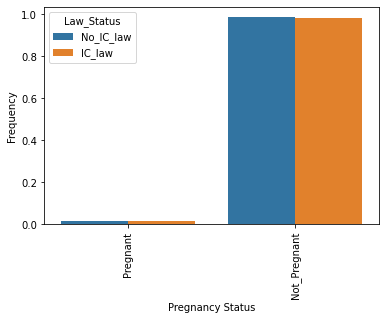

In [70]:
plt.xticks(rotation=90)
sns.barplot(
    data=pd.melt(
        totals.div(totals.sum(axis=1), axis=0).reset_index(),
        id_vars = 'IC_Circumstances_Protect an unborn child',
        value_vars = ['Pregnant', 'Not_Pregnant'],
        var_name = "Pregnancy Status",
        value_name = "Frequency"
    ).assign(
        Law_Status = lambda x: x.apply(lambda y: 'No_IC_law' if y['IC_Circumstances_Protect an unborn child'] == 0 else 'IC_law', axis=1)
    ),
    x="Pregnancy Status",
    y="Frequency",
    hue="Law_Status",
    
)

**Alcohol Patients: Proportion of cases in each discharge category that are subject to IC Laws**

In [ ]:
 totals.div(totals.sum(axis=0), axis=1).reset_index()

In [ ]:
plt.xticks(rotation=90)
sns.barplot(
    data=pd.melt(
        totals.div(totals.sum(axis=0), axis=1).reset_index(),
        id_vars = 'IC_Circumstances_Protect an unborn child',
        value_vars = ['Pregnant', 'Not_Pregnant'],
        var_name = "Pregnancy Status",
        value_name = "Frequency"
    ).assign(
        Law_Status = lambda x: x.apply(lambda y: 'No_IC_law' if y['IC_Circumstances_Protect an unborn child'] == 0 else 'IC_law', axis=1)
    ),
    x="Pregnancy Status",
    y="Frequency",
    hue="Law_Status",
    
)

**Heroin Patients: Proportion Cases in each dischrage category by IC Laws**

In [ ]:
fem_hrn_cases = teds_laws[
    (teds_laws['hrn_cases'] == 1) & (~pd.isna(teds_laws.PREG))
].index
teds_laws.loc[fem_hrn_cases,:].shape

In [ ]:
totals=teds_laws.loc[fem_hrn_cases,['IC_Circumstances_Protect an unborn child', 'PREG']].assign(
    Pregnant = lambda x: x.loc[:,['PREG']].apply(lambda x: x['PREG'] == 1, axis=1),
    Not_Pregnant = lambda x: x.loc[:,['PREG']].apply(lambda x: x['PREG'] == 2, axis=1)
).groupby(['IC_Circumstances_Protect an unborn child']).sum().drop(columns=['PREG'])
totals

In [ ]:
 totals.div(totals.sum(axis=1), axis=0).reset_index()

In [ ]:
plt.xticks(rotation=90)
sns.barplot(
    data=pd.melt(
        totals.div(totals.sum(axis=1), axis=0).reset_index(),
        id_vars = 'IC_Circumstances_Protect an unborn child',
        value_vars = ['Pregnant', 'Not_Pregnant'],
        var_name = "Pregnancy Status",
        value_name = "Frequency"
    ).assign(
        Law_Status = lambda x: x.apply(lambda y: 'No_IC_law' if y['IC_Circumstances_Protect an unborn child'] == 0 else 'IC_law', axis=1)
    ),
    x="Pregnancy Status",
    y="Frequency",
    hue="Law_Status",
    
)

**Heroin Patients: Proportion of cases in each discharge category that are subject to IC Laws**

In [ ]:
 totals.div(totals.sum(axis=0), axis=1).reset_index()

In [ ]:
plt.xticks(rotation=90)
sns.barplot(
    data=pd.melt(
        totals.div(totals.sum(axis=0), axis=1).reset_index(),
        id_vars = 'IC_Circumstances_Protect an unborn child',
        value_vars = ['Pregnant', 'Not_Pregnant'],
        var_name = "Pregnancy Status",
        value_name = "Frequency"
    ).assign(
        Law_Status = lambda x: x.apply(lambda y: 'No_IC_law' if y['IC_Circumstances_Protect an unborn child'] == 0 else 'IC_law', axis=1)
    ),
    x="Pregnancy Status",
    y="Frequency",
    hue="Law_Status",
    
)

**Methamphetamine Patients: Proportion Cases in each dischrage category by IC Laws**

In [ ]:
fem_hrn_cases = teds_laws[
    (teds_laws['hrn_cases'] == 1) & (~pd.isna(teds_laws.PREG))
].index
teds_laws.loc[fem_hrn_cases,:].shape

In [ ]:
totals=teds_laws.loc[fem_hrn_cases,['IC_Circumstances_Protect an unborn child', 'PREG']].assign(
    Pregnant = lambda x: x.loc[:,['PREG']].apply(lambda x: x['PREG'] == 1, axis=1),
    Not_Pregnant = lambda x: x.loc[:,['PREG']].apply(lambda x: x['PREG'] == 2, axis=1)
).groupby(['IC_Circumstances_Protect an unborn child']).sum().drop(columns=['PREG'])
totals

In [ ]:
 totals.div(totals.sum(axis=1), axis=0).reset_index()

In [ ]:
plt.xticks(rotation=90)
sns.barplot(
    data=pd.melt(
        totals.div(totals.sum(axis=1), axis=0).reset_index(),
        id_vars = 'IC_Circumstances_Protect an unborn child',
        value_vars = ['Pregnant', 'Not_Pregnant'],
        var_name = "Pregnancy Status",
        value_name = "Frequency"
    ).assign(
        Law_Status = lambda x: x.apply(lambda y: 'No_IC_law' if y['IC_Circumstances_Protect an unborn child'] == 0 else 'IC_law', axis=1)
    ),
    x="Pregnancy Status",
    y="Frequency",
    hue="Law_Status",
    
)

**Methamphetamine Patients: Proportion of cases in each discharge category that are subject to IC Laws**

In [ ]:
 totals.div(totals.sum(axis=0), axis=1).reset_index()

In [ ]:
plt.xticks(rotation=90)
sns.barplot(
    data=pd.melt(
        totals.div(totals.sum(axis=0), axis=1).reset_index(),
        id_vars = 'IC_Circumstances_Protect an unborn child',
        value_vars = ['Pregnant', 'Not_Pregnant'],
        var_name = "Pregnancy Status",
        value_name = "Frequency"
    ).assign(
        Law_Status = lambda x: x.apply(lambda y: 'No_IC_law' if y['IC_Circumstances_Protect an unborn child'] == 0 else 'IC_law', axis=1)
    ),
    x="Pregnancy Status",
    y="Frequency",
    hue="Law_Status",
    
)